In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import pandas as pd
import os
import umap

In [12]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [14]:
# Analizo todas los  x="high" y="nombre del archivo". Ejm

In [16]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [17]:
n_max=1200#number of files taken
n_data=50# last days taken
#n_max=len(files)
X=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>49):
            X=np.append(X,data[label[2]][-n_data:])#toma todos los datos con high
            cnt+=1
#        Y=np.append(Y,data[label[4]][-n_data:])#toma todos los datos con high
X=X.reshape(cnt,n_data)
Y=np.arange(cnt)
#Y=Y.reshape(n_max,n_data)
#print(20*3201)
print(np.shape(X))
print(np.shape(Y))

(1137, 50)
(1137,)


In [43]:
cnt_2=0
embedding_best=np.zeros((1137,2,4))

/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 202 separate connected components using meta-embedding (experimental)
  n_components
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 202 separate connected components using meta-embedding (experimental)
  n_components
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation faile

ValueError: num must be 1 <= num <= 25, not 26

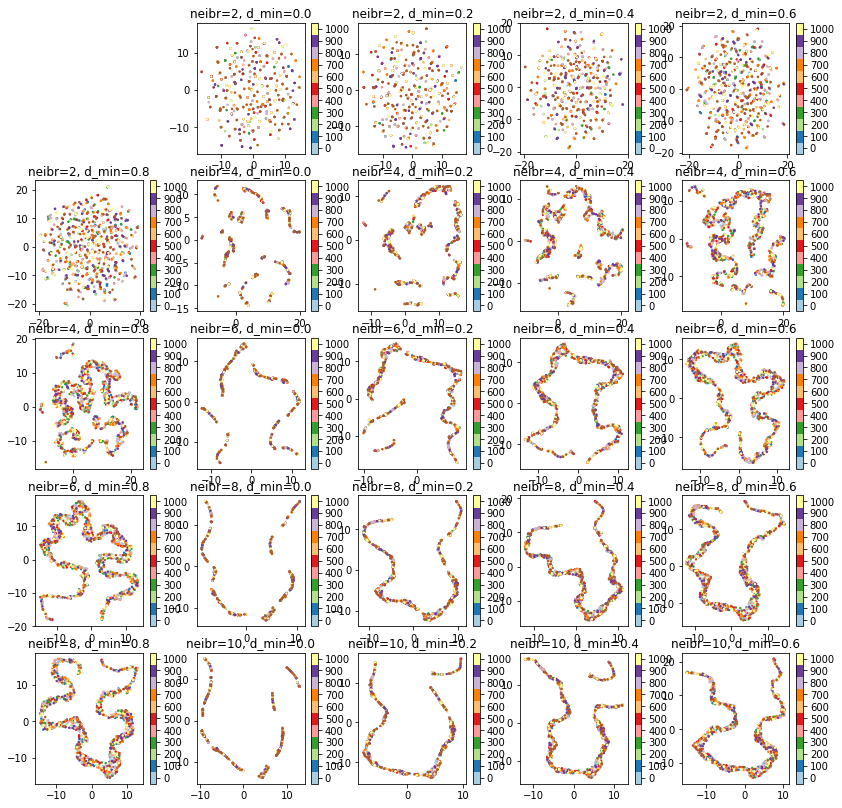

In [45]:
plt.figure(1,figsize = (14,14))
for i in range(2,12,2):
    for j in np.arange(0,1,0.2):
        reducer = umap.UMAP(n_neighbors=i, min_dist=j, metric='euclidean')#, n_components=2)
        reducer.fit(X)
        embedding = reducer.transform(X)
        np.shape(embedding)   
        if (2<=i<=8 and j==0.2):
            embedding_best[:,:,int(i/2)-1]=embedding
        np.shape(embedding)
        cnt_2+=1
        plt.subplot(5,5,cnt_2)
        plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=2.0)
        #plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)
        plt.colorbar(boundaries=np.arange(0,cnt,100)-50).set_ticks(np.arange(0,cnt,100))
        plt.title("neibr={}, d_min={:.1f}".format(i,j))
plt.savefig("umap.png")

# Clustering sobre neibr={2,4,6,8}, d_min=0.2

In [ ]:
a=embedding_best
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(a[:,0,i], a[:,1,i], c=Y, cmap='Paired', s=2.0)
        #plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)
    plt.colorbar(boundaries=np.arange(0,cnt,100)-50).set_ticks(np.arange(0,cnt,100))
    plt.title("neibr={}".format(i))

In [40]:
print(np.shape(embedding_best))
print(1137*2*4)

(9096,)
9096


In [ ]:
#n_clusters = 10
#Esto se hace para perplexity=10
plt.figure(3,figsize = (10,20))
for i in range(1):
    for n_clusters in range(1,11):
        k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
        k_means.fit(embedding_best[:,:,i]) # training
        cluster = k_means.predict(embedding_best[:,:,i]) # predice a cual cluster corresponde cada elmento
        distance = k_means.transform(embedding_best[:,:,i]) # calcula la distancia de cada elemento al centro de su cluster
        plt.subplot(5,2,n_clusters)
        plt.scatter(embedding_best[:,0,i], embedding_best[:,1,i], c=cluster, cmap='Paired', s=1.0)
        plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(n_clusters))
plt.savefig("clusters.png")

In [27]:
for i in range(2,12,2):
    for j in np.arange(0,1.2,0.2):
        if (2<=i<=8 and j==0.2):
            print(i)

2
4
6
8
